In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
import operator
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
location = r'C:\Users\sneha\Documents\Machine Learning\Project\Machine Learning Dataset\Clean Data version 1\USA_Dataset.csv'
data_usa = pd.read_csv(location)
data_usa

,id,loc,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
0,2001,Cleveland,0,63,1,-9,-9,-9,-9,1,...,-9,1,1,1,1,1,1,1,-9.00,-9.0
1,2002,Cleveland,0,67,1,-9,-9,-9,-9,4,...,-9,1,1,1,1,1,1,1,-9.00,-9.0
2,2003,Cleveland,0,67,1,-9,-9,-9,-9,4,...,-9,2,2,1,1,1,7,3,-9.00,-9.0
3,2004,Cleveland,0,37,1,-9,-9,-9,-9,3,...,-9,1,1,1,1,1,1,1,-9.00,-9.0
4,2005,Cleveland,0,41,0,-9,-9,-9,-9,2,...,-9,1,1,1,1,1,1,1,-9.00,-9.0
5,2006,Cleveland,0,56,1,-9,-9,-9,-9,2,...,-9,1,1,1,1,1,1,1,-9.00,-9.0
6,2007,Cleveland,0,62,0,-9,-9,-9,-9,4,...,-9,2,1,1,1,1,7,1,-9.00,-9.0
7,2008,Cleveland,0,57,0,-9,-9,-9,-9,4,...,-9,1,1,1,1,1,1,1,-9.00,-9.0
8,2009,Cleveland,0,63,1,-9,-9,-9,-9,4,...,-9,2,1,1,1,6,7,2,-9.00,-9.0
9,2010,Cleveland,0,53,1,-9,-9,-9,-9,4,...,-9,2,1,1,1,1,1,1,-9.00,-9.0


In [40]:
def standardize(df, col_name):
    mean = df[col_name].mean()
    sd = df[col_name].std()
    df[col_name] = (df[col_name]-mean)/float(sd)
    return df[col_name]
for i in list(data_processed.columns.values):
    data_processed[i] = standardize(data_processed,i)

In [4]:
df_predictor = data_usa['num']
unused_cols = ['num','id','dm','thaltime','ccf','lvx1','lvx2','lvx3','lvx4','lvf','cathef','junk','restckm','exerckm','thalsev','thalpul','dummy','smoke','earlobe','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','painloc','painexer','relrest','pncaden','restef','rldv5','restwm','exeref','exerwm','ca']
data_usa.drop(columns = unused_cols, axis = 1,inplace = True)
data_processed = pd.get_dummies(data_usa, columns = ['cp','restecg','slope','thal','loc'])

In [5]:
#Creating target column with Binary Values
condition = df_predictor == 0
data_processed['target'] = np.where(condition, 0 , 1)

In [6]:
#Splitting into Train and Test Data
data = data_processed.as_matrix()
train_x, test_x, train_y, test_y = train_test_split(data[:, 0:-1], data[:,-1],
                                                        train_size=0.75)

In [61]:
# function takes a RF parameter and a ranger and produces a plot and dataframe of CV scores for parameter values
def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(RandomForestClassifier(random_state = 123), param_grid = {parameter: num_range})
    grid_search.fit(train_x, train_y)
    #print(grid_search.grid_scores_)
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

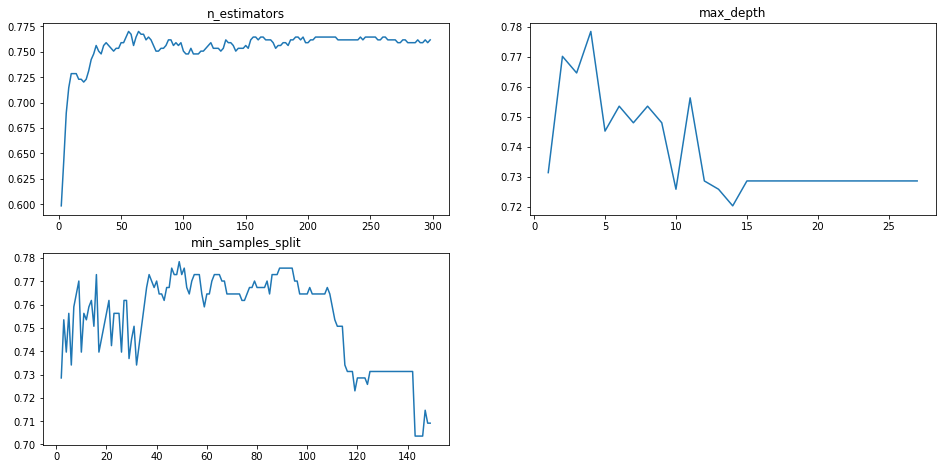

In [63]:
# parameters and ranges to plot
np.random.seed(123)
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(2,150,1)
             }
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1
plt.show()


In [7]:
#Grid Search for Hyperparameter Tuning
clf = RandomForestClassifier(random_state = 80)
param_grid = { 
           "criterion" : ['gini', 'entropy'],
           "n_estimators" : [51,53,54,56],
           "max_depth" : [2,3,4],
           "min_samples_split" : [50,51,52,53]          
           }
CV_rf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_rf.fit(train_x, train_y)
print(CV_rf.best_params_)
print(CV_rf.grid_scores_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 53, 'n_estimators': 51}
[mean: 0.76731, std: 0.07624, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 51}, mean: 0.76731, std: 0.06587, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 53}, mean: 0.76454, std: 0.07510, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 54}, mean: 0.76454, std: 0.07629, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 56}, mean: 0.76731, std: 0.07624, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 51, 'n_estimators': 51}, mean: 0.76731, std: 0.06587, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 51, 'n_estimators': 53}, mean: 0.76454, std: 0.07510, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 51, 'n_estimators': 54}, mean: 0.76454, std: 0.07629, params: {'criterion': 'gini', 'max_depth

In [8]:
#Building Random Forest Classifier

clf = RandomForestClassifier(random_state = 80,criterion ='entropy',max_depth= 3,n_estimators= 51, min_samples_split = 53)
model = clf.fit(train_x,train_y)
predictions_test = model.predict(test_x)
predictions_train = model.predict(train_x)
accuracy_test = accuracy_score(test_y, predictions_test)
accuracy_train = accuracy_score(train_y, predictions_train)
print("Test Acuuracy :"+str(accuracy_test))
print("Training Acuuracy :"+str(accuracy_train))


Test Acuuracy :0.768595041322
Training Acuuracy :0.80055401662


Sensitivity :0.866666666667
Specificity :0.672131147541


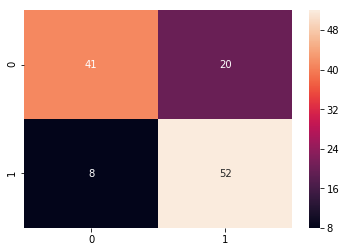

In [9]:
#Confusion matrix
cm = pd.DataFrame(confusion_matrix(test_y, predictions_test), columns = [0 ,1], index = [0,1])
print("Sensitivity :"+str(float(cm[1][1])/(cm[1][1]+cm[0][1])))
print("Specificity :"+str(float(cm[0][0])/(cm[0][0]+cm[1][0])))
sns.heatmap(cm, annot=True)
plt.show()

In [10]:
f = {}
df_tgt = data_processed['target']
for idx, col_name in enumerate(list(data_usa.columns.values)):
    f[col_name] = clf.feature_importances_[idx]
sorted_f = sorted(f.items(), key=operator.itemgetter(1),reverse=True)

In [11]:
sorted_f

[('cday', 0.14848841127363896),
 ('proto', 0.12737338270822654),
 ('trestbpd', 0.065745091886594442),
 ('age', 0.065019615060543115),
 ('diuretic', 0.058965717788992844),
 ('tpeakbps', 0.047121310288881182),
 ('exang', 0.046175707266100263),
 ('pro', 0.042564852289867144),
 ('loc', 0.036137965478952587),
 ('thal', 0.028349442934181426),
 ('trestbps', 0.0225960280881232),
 ('thaldur', 0.020112642019132845),
 ('cmo', 0.018208329608616038),
 ('fbs', 0.013209106524887812),
 ('chol', 0.010866451875562079),
 ('sex', 0.008630969289445501),
 ('restecg', 0.0068531457151567885),
 ('xhypo', 0.0062829249501537773),
 ('htn', 0.0061971275382738276),
 ('thalrest', 0.0058644894748136646),
 ('met', 0.0054109310311778042),
 ('ekgmo', 0.0052955486766125756),
 ('cyr', 0.0052831798797055548),
 ('famhist', 0.004047780793463936),
 ('nitr', 0.0039440579468312774),
 ('oldpeak', 0.0032810737993035433),
 ('prop', 0.001376304382561347),
 ('ekgyr', 0.0013518537796048569),
 ('thalach', 0.001095616284498522),
 ('slo

In [12]:
#Top 10 important features
imp_features = []
for i in sorted_f[0:11]:
    k ,v = i
    k = i[0]
    imp_features.append(k)

In [13]:
imp_features

['cday',
 'proto',
 'trestbpd',
 'age',
 'diuretic',
 'tpeakbps',
 'exang',
 'pro',
 'loc',
 'thal',
 'trestbps']

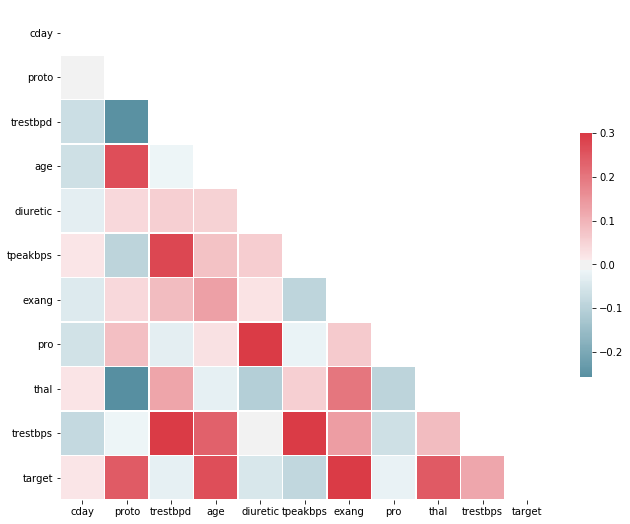

In [14]:
#Correlation Matrix for important features
df_tgt = data_processed['target']
data_imp = data_usa[imp_features]
data_correlated_imp = pd.concat([data_imp,df_tgt],axis =1)
correlations = data_correlated_imp.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()